# Soal 10
1. Load Boston dataset
2. Buat pairplotnya
3. Apakah ada prediktor yang memiliki hubungan terhadap per capita crime rate
4. Apakah suburb Boston (pinggiran kota Boston) memiliki tingkat kriminal yang tinggi atau pajak yang tinggi atau rasio siswa dan guru?
5. Berapa banyak suburb (pinggiran kota) yang terikat/memiliki/dekat dengan sungai Charles
6. Median dari pupil-teacher ratio
7. Suburb yang mana memiliki nilai median terendah  untuk owner-occupied homes
8. Berapa rataan suburb more than seven rooms per dwelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Load Boston Dataset

Berapa rownya? Berapa columnnya? Row dan Columnnya itu merepresentasikan apa?

In [2]:
from sklearn.datasets import load_boston

Info mengenai boston dataset bisa dilihat [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

In [3]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston.data.shape

(506, 13)

In [5]:
df = pd.DataFrame(boston.data)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Karena columnya belum mempunyai nama, kita berikan nama menggunakan perintah di bawah ini

In [7]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Karena tabel di atas belum memiliki `pricing`, maka kita tambahkan dengan menggunakan `target`

In [8]:
df['target'] = boston.target

In [9]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Dari hasil di atas diketahui bahwa Boston dataset memiliki 506 baris dan 14 kolom (ditambah kolom target). Deskripsi di atas menjelaskan tentang apa itu Boston dataset dan arti tiap kolomnya.

## 2. Pairplot

Sama seperti di soal sebelumnya, kita akan menggunakan `PairGrid`

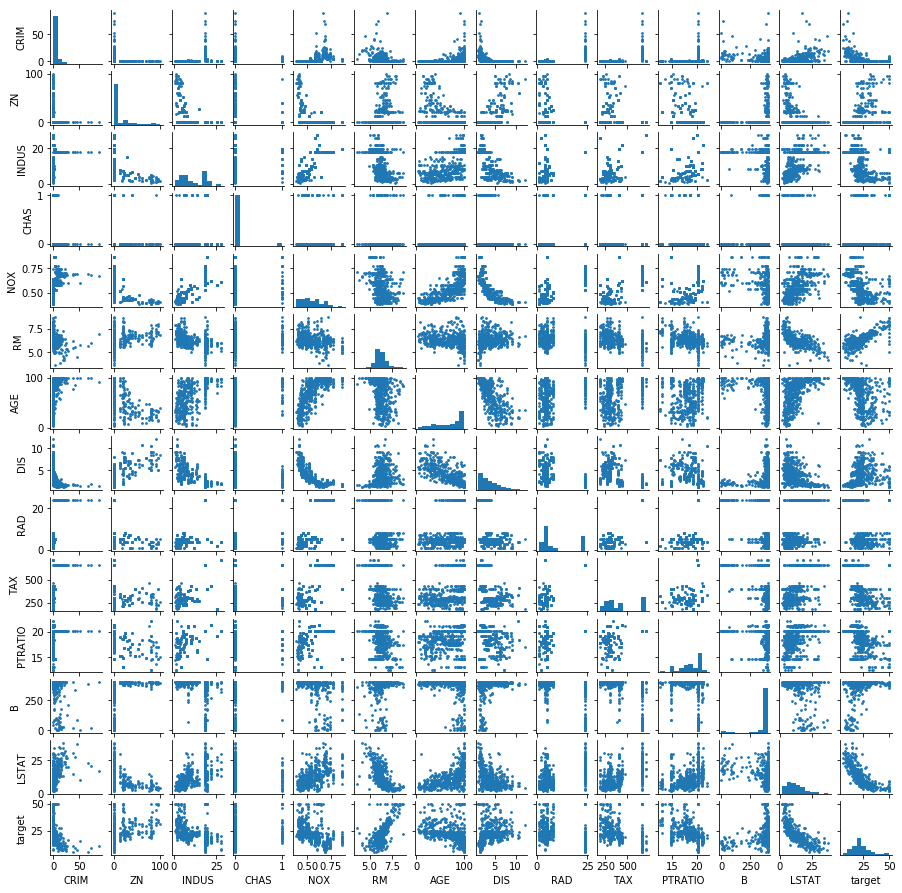

In [10]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)

Beberapa findings dapat ditemukan dari melihat pairplot di atas. Contohnya RM dan target berkorelasi cukup kuat. LSTAT dan target juga. NOX dan DIS. dll (kalian bisa mencarinya sendiri)

## 3. Apakah ada prediktor yang memiliki hubungan terhadap per capita crime rate

Kita menggunakan `pandas.DataFrame.corrwith` yang dapat dilihat lebih jelas [di sini](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corrwith.html)
<br>
Dan juga kita menggunakan `pandas.DataFrame.sort_values`. Selengkapnya bisa diakses [di sini](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

In [11]:
df.corrwith(df['CRIM'])

CRIM       1.000000
ZN        -0.199458
INDUS      0.404471
CHAS      -0.055295
NOX        0.417521
RM        -0.219940
AGE        0.350784
DIS       -0.377904
RAD        0.622029
TAX        0.579564
PTRATIO    0.288250
B         -0.377365
LSTAT      0.452220
target    -0.385832
dtype: float64

In [12]:
df.corrwith(df['CRIM']).sort_values()

target    -0.385832
DIS       -0.377904
B         -0.377365
RM        -0.219940
ZN        -0.199458
CHAS      -0.055295
PTRATIO    0.288250
AGE        0.350784
INDUS      0.404471
NOX        0.417521
LSTAT      0.452220
TAX        0.579564
RAD        0.622029
CRIM       1.000000
dtype: float64

Dari [situs ini](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php), di katakan bahwa nilai korelasi di antara 0.5 hingga 1 (atau -0.5 hingga 1) dapat dikatakan berkorelasi cukup kuat. Sehingga `TAX` dan  `RAD` berkorelasi cukup kuat dengan `CRIM`

## 4. Apakah suburb Boston (pinggiran kota Boston) memiliki tingkat kriminal yang  cukup tinggi dibandingkan yang lain atau pajak yang tinggi atau rasio siswa dan guru?



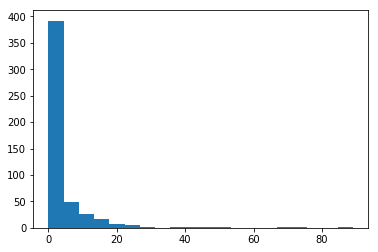

In [37]:
plt.hist(df['CRIM'], bins=20)
plt.show()

(0.0, 340.0)

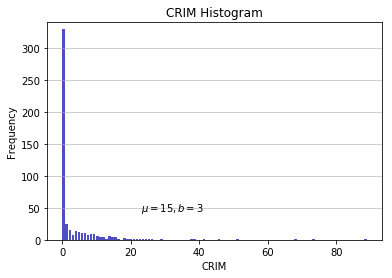

In [14]:
n, bins, patches = plt.hist(x=df['CRIM'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CRIM')
plt.ylabel('Frequency')
plt.title('CRIM Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 140.0)

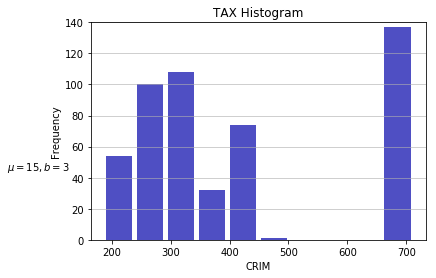

In [15]:
n, bins, patches = plt.hist(x=df['TAX'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CRIM')
plt.ylabel('Frequency')
plt.title('TAX Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 150.0)

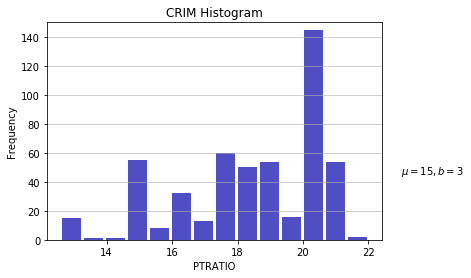

In [16]:
n, bins, patches = plt.hist(x=df['PTRATIO'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.title('CRIM Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Berikut cara lain memplot histogram ketiga variabel tersebut menggunakan `PairGrid`

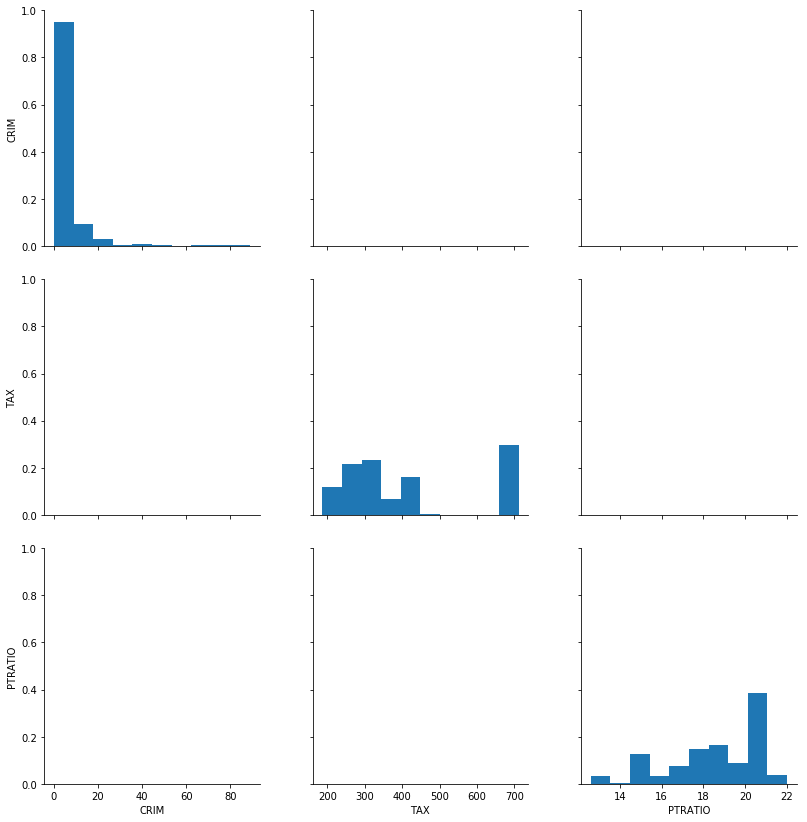

In [17]:
g = sns.PairGrid(df, vars=['CRIM', 'TAX', 'PTRATIO'])
g.map_diag(plt.hist)
g.fig.set_size_inches(12, 12)

Dapat dilihat bahwa yang *particularly high* hanya `CRIM` saja. `PTRATIO` dapat dibilang tinggi namun tidak sampai kategori *particularly high*.
<br>
Maaf, saya tidak bisa mengartikan arti **particulary high** ke dalam bahasa Indonesia. Intinya, maksud dari *particulary high* bahwa ada bin histogramnnya yang sangat amat tinggi di bandingkan yang lain seperti yang ditunjukkan oleh `CRIM`

## 5. Berapa banyak suburb (pinggiran kota) yang terikat/memiliki/dekat dengan sungai Charles

kita menggunakan `pandas.Series.value_counts` yang dapat dilihat [di sini](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [18]:
df['CHAS']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
476    0.0
477    0.0
478    0.0
479    0.0
480    0.0
481    0.0
482    0.0
483    0.0
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
492    0.0
493    0.0
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
500    0.0
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [19]:
df['CHAS'].value_counts()[1]

35

## 6. Median dari pupil-teacher ratio

Kita menggunakan `pandas.DataFrame.median` yang dapat dilihat lebih jelas [di sini](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html)

In [20]:
df['PTRATIO'].median()

19.05

## 7. Suburb yang mana memiliki nilai median terendah untuk owner-occupied homes

In [21]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
df['target']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [23]:
df['target'].idxmin()

398

In [24]:
df.loc[398]

CRIM        38.3518
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6930
RM           5.4530
AGE        100.0000
DIS          1.4896
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          396.9000
LSTAT       30.5900
target       5.0000
Name: 398, dtype: float64

In [25]:
boston_desc = df.describe()
boston_desc.loc['range'] = boston_desc.loc['max'] - boston_desc.loc['min']

In [26]:
boston_desc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
range,88.969880,100.000000,27.280000,1.000000,0.486000,5.219000,97.100000,10.996900,23.000000,524.000000,9.400000,396.580000,36.240000,45.000000


In [27]:
min_value = pd.DataFrame(data=df.iloc[398])

In [28]:
min_value

,398
CRIM,38.3518
ZN,0.0000
INDUS,18.1000
CHAS,0.0000
NOX,0.6930
RM,5.4530
AGE,100.0000
DIS,1.4896
RAD,24.0000
TAX,666.0000


In [29]:
min_value.rename(columns={398:'min'})

,min
CRIM,38.3518
ZN,0.0000
INDUS,18.1000
CHAS,0.0000
NOX,0.6930
RM,5.4530
AGE,100.0000
DIS,1.4896
RAD,24.0000
TAX,666.0000


In [30]:
boston_desc.append(min_value.T)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
range,88.969880,100.000000,27.280000,1.000000,0.486000,5.219000,97.100000,10.996900,23.000000,524.000000,9.400000,396.580000,36.240000,45.000000
398,38.351800,0.000000,18.100000,0.000000,0.693000,5.453000,100.000000,1.489600,24.000000,666.000000,20.200000,396.900000,30.590000,5.000000


## 6. Berapa rataan suburb more than seven rooms per dwelling



In [31]:
df['RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [32]:
len(df[df['RM']>7])

64

In [33]:
len(df[df['RM']>8])

13

In [34]:
df[df['RM']>8]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0.0,0.5070,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0.0,0.5070,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0


In [35]:
df[df['RM']>8].describe()
# crimenya rendah

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


In [36]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Silahkan dibandingkan describe data antara room yang dwellingnya lebih dari 8 dengan data secara keseluruhan. Sebagai contoh, crime yang RM > 8 lebih rendah jika dibandingkan dengan rataan kejahatan secara total